# import the libraries

In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import Counter


## load the dataset

In [2]:
agegrp=pd.read_csv('C:/Users/User/Desktop/ML hub/house/covid 19 dataset/AgeGroupDetails.csv')
covidindia=pd.read_csv('C:/Users/User/Desktop/ML hub/house/covid 19 dataset/covid_19_india.csv')
hospitalbeds=pd.read_csv('C:/Users/User/Desktop/ML hub/house/covid 19 dataset/HospitalBedsIndia.csv')
individualdetails=pd.read_csv('C:/Users/User/Desktop/ML hub/house/covid 19 dataset/IndividualDetails.csv')

In [3]:
agegrp.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [4]:
agegrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 400.0+ bytes


In [5]:
## finding if any null value is in the dataset
agegrp.isnull().sum()

Sno           0
AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1BD56E320>,
      dtype=object)

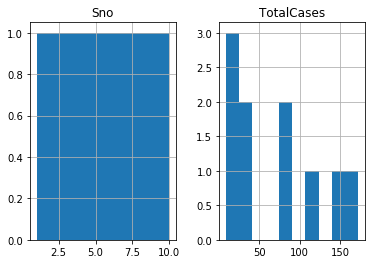

In [6]:
agegrp.hist()

In [7]:
agegrp.corr()

,Sno,TotalCases
Sno,1.000000,-0.359919
TotalCases,-0.359919,1.000000


In [8]:
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
covidindia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
Sno                         894 non-null int64
Date                        894 non-null object
Time                        894 non-null object
State/UnionTerritory        894 non-null object
ConfirmedIndianNational     894 non-null object
ConfirmedForeignNational    894 non-null object
Cured                       894 non-null int64
Deaths                      894 non-null int64
Confirmed                   894 non-null int64
dtypes: int64(4), object(5)
memory usage: 62.9+ KB


In [11]:
covidindia.isnull().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

In [12]:
print(type(covidindia))

<class 'pandas.core.frame.DataFrame'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1BD947208>,
      dtype=object)

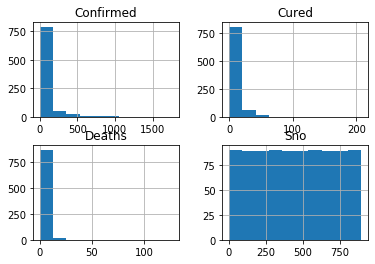

In [13]:
covidindia.hist()

In [14]:
covidindia.corr()# for of the above given data we can applay this 

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.364401,0.267066,0.426899
Cured,0.364401,1.000000,0.742314,0.779536
Deaths,0.267066,0.742314,1.000000,0.780448
Confirmed,0.426899,0.779536,0.780448,1.000000


In [15]:
hospitalbeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [16]:
hospitalbeds.isnull().sum()

Sno                                  1
State/UT                             1
NumPrimaryHealthCenters_HMIS         1
NumCommunityHealthCenters_HMIS       1
NumSubDistrictHospitals_HMIS         8
NumDistrictHospitals_HMIS            1
TotalPublicHealthFacilities_HMIS     1
NumPublicBeds_HMIS                   1
NumRuralHospitals_NHP18              1
NumRuralBeds_NHP18                   1
NumUrbanHospitals_NHP18              1
NumUrbanBeds_NHP18                   1
Unnamed: 12                         38
Unnamed: 13                         38
dtype: int64

In [18]:
## we have to remove that 
hospitalbeds=hospitalbeds[:-2]
hospitalbeds.fillna(0,inplace=True)
hospitalbeds.head()


C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27.0,575.0,3.0,500.0,0.0,0.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,0.0,0.0
2,3.0,Arunachal Pradesh,122,62,0,15,199,2320,208.0,2136.0,10.0,268.0,0.0,0.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,0.0,0.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,0.0,0.0


In [19]:
hospitalbeds.isnull().sum()# we remove the null value from our dataset

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        0
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
Unnamed: 12                         0
Unnamed: 13                         0
dtype: int64

In [20]:
hospitalbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
Sno                                 34 non-null float64
State/UT                            34 non-null object
NumPrimaryHealthCenters_HMIS        34 non-null object
NumCommunityHealthCenters_HMIS      34 non-null object
NumSubDistrictHospitals_HMIS        34 non-null object
NumDistrictHospitals_HMIS           34 non-null object
TotalPublicHealthFacilities_HMIS    34 non-null object
NumPublicBeds_HMIS                  34 non-null object
NumRuralHospitals_NHP18             34 non-null float64
NumRuralBeds_NHP18                  34 non-null float64
NumUrbanHospitals_NHP18             34 non-null float64
NumUrbanBeds_NHP18                  34 non-null float64
Unnamed: 12                         34 non-null float64
Unnamed: 13                         34 non-null float64
dtypes: float64(7), object(7)
memory usage: 3.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1BDCD1208>,
      dtype=object)

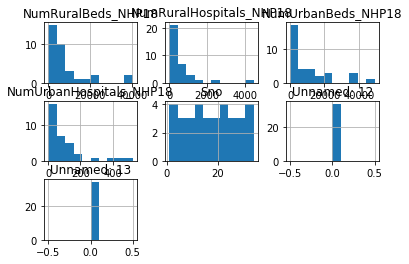

In [21]:
hospitalbeds.hist()

In [22]:
hospitalbeds.corr()

,Sno,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
Sno,1.000000,0.280003,0.363250,0.307841,0.258860,NaN,NaN
NumRuralHospitals_NHP18,0.280003,1.000000,0.722680,0.427109,0.613469,NaN,NaN
NumRuralBeds_NHP18,0.363250,0.722680,1.000000,0.772980,0.771894,NaN,NaN
NumUrbanHospitals_NHP18,0.307841,0.427109,0.772980,1.000000,0.880665,NaN,NaN
NumUrbanBeds_NHP18,0.258860,0.613469,0.771894,0.880665,1.000000,NaN,NaN
Unnamed: 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for col in hospitalbeds.columns[2:]:
    if hospitalbeds[col].dtype=='object':
        hospitalbeds[col]=hospitalbeds[col].astype('int64')

C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
covidindia['Date']=pd.to_datetime(covidindia['Date'])

## Visualizations

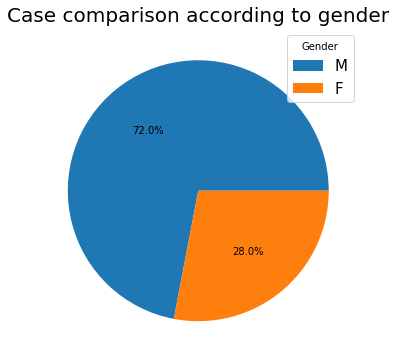

In [26]:
gender=individualdetails.gender
gender.dropna(inplace=True)
gender=gender.value_counts()
per=[]
for i in gender:
    perc=i/gender.sum()
    per.append(format(perc,'.2f'))
plt.figure(figsize=(10,6))    
plt.title('Case comparison according to gender',fontsize=20)
plt.pie(per,autopct='%1.1f%%')
plt.legend(gender.index,loc='best',title='Gender',fontsize=15)

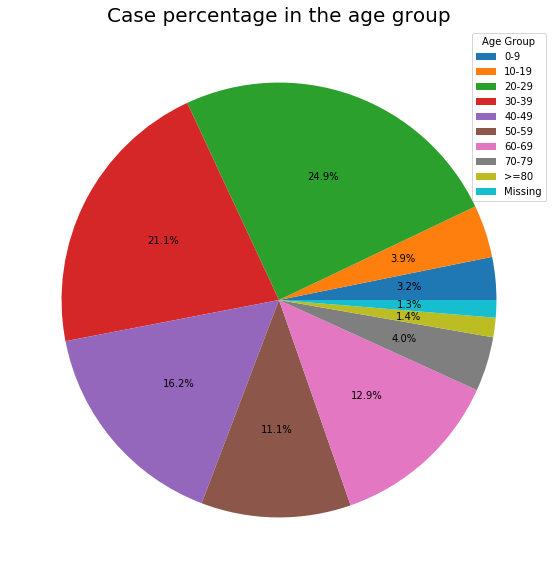

In [27]:
perc=[]
for i in agegrp['Percentage']:
    per=float(re.findall("\d+\.\d+",i)[0])
    perc.append(per)
agegrp['Percentage']=perc
plt.figure(figsize=(20,10))
plt.title('Case percentage in the age group',fontsize=20)
plt.pie(agegrp['Percentage'],autopct='%1.1f%%')
plt.legend(agegrp['AgeGroup'],loc='best',title='Age Group')

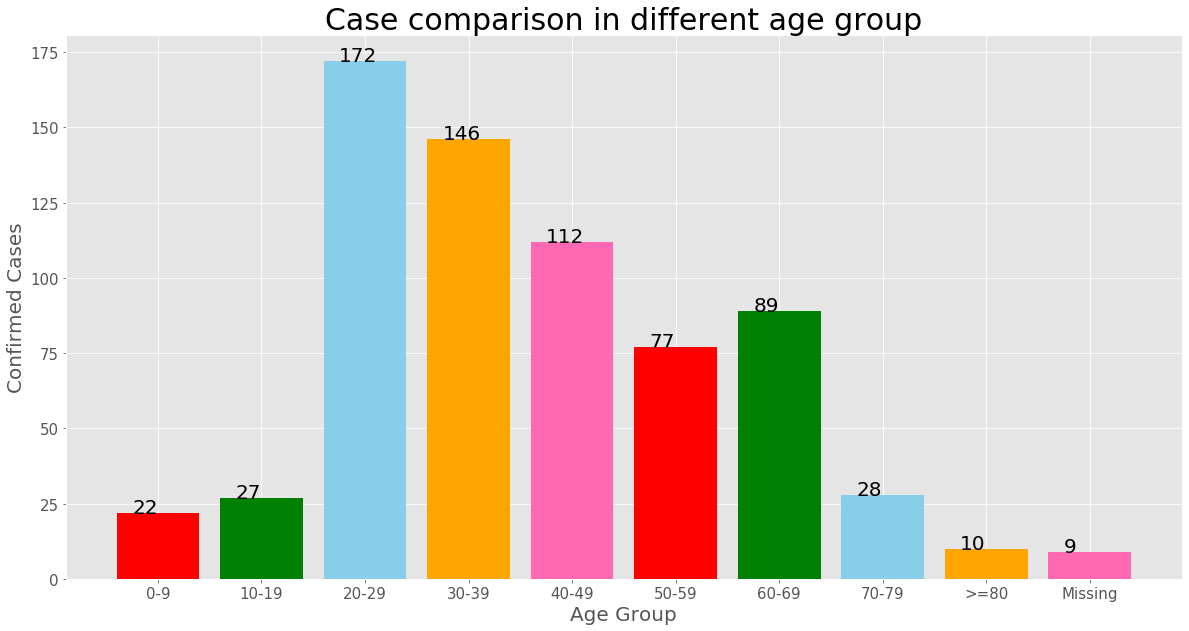

In [28]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Case comparison in different age group',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age Group',fontsize=20)
plt.ylabel('Confirmed Cases',fontsize=20)
plt.bar(agegrp['AgeGroup'],agegrp['TotalCases'],color=['Red','green','skyblue','orange','hotpink'],linewidth=3)
for i, j in enumerate(agegrp['TotalCases']):
    plt.text(i-.25, j,
              agegrp['TotalCases'][i], 
              fontsize=20 )

<BarContainer object of 20 artists>

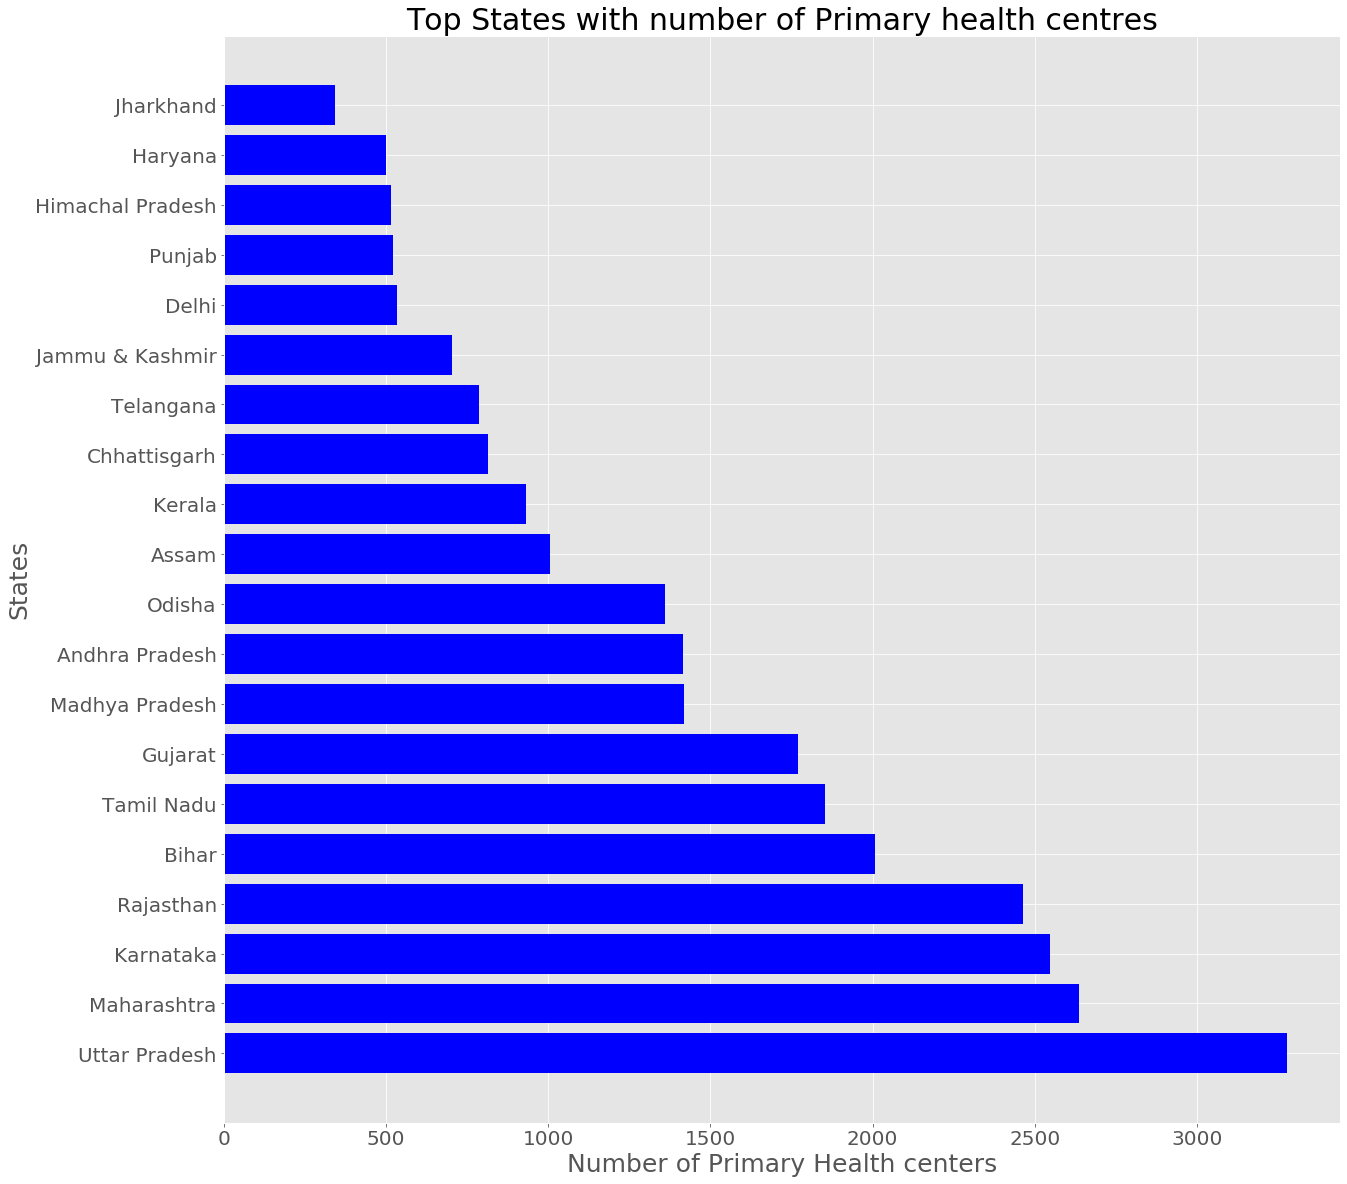

In [29]:
top=hospitalbeds.nlargest(20,'NumPrimaryHealthCenters_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top States with number of Primary health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Primary Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumPrimaryHealthCenters_HMIS'],color='blue',linewidth=1)

<BarContainer object of 20 artists>

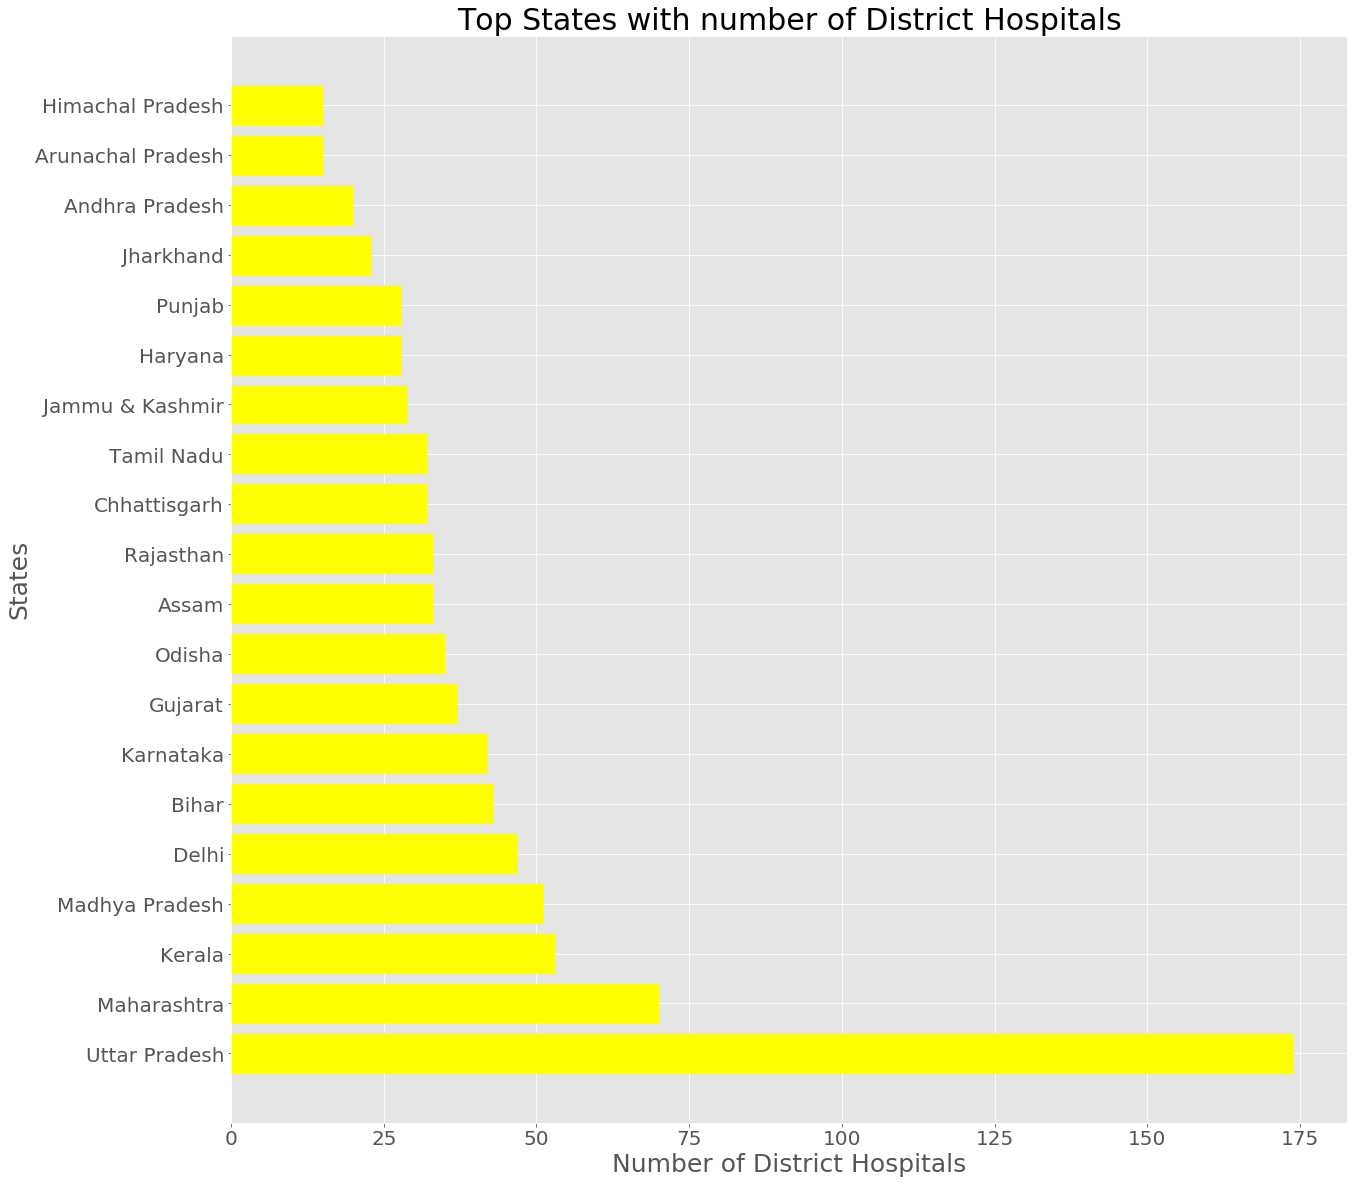

In [30]:
top=hospitalbeds.nlargest(20,'NumDistrictHospitals_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top States with number of District Hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of District Hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumDistrictHospitals_HMIS'],color='yellow',linewidth=3)

<BarContainer object of 20 artists>

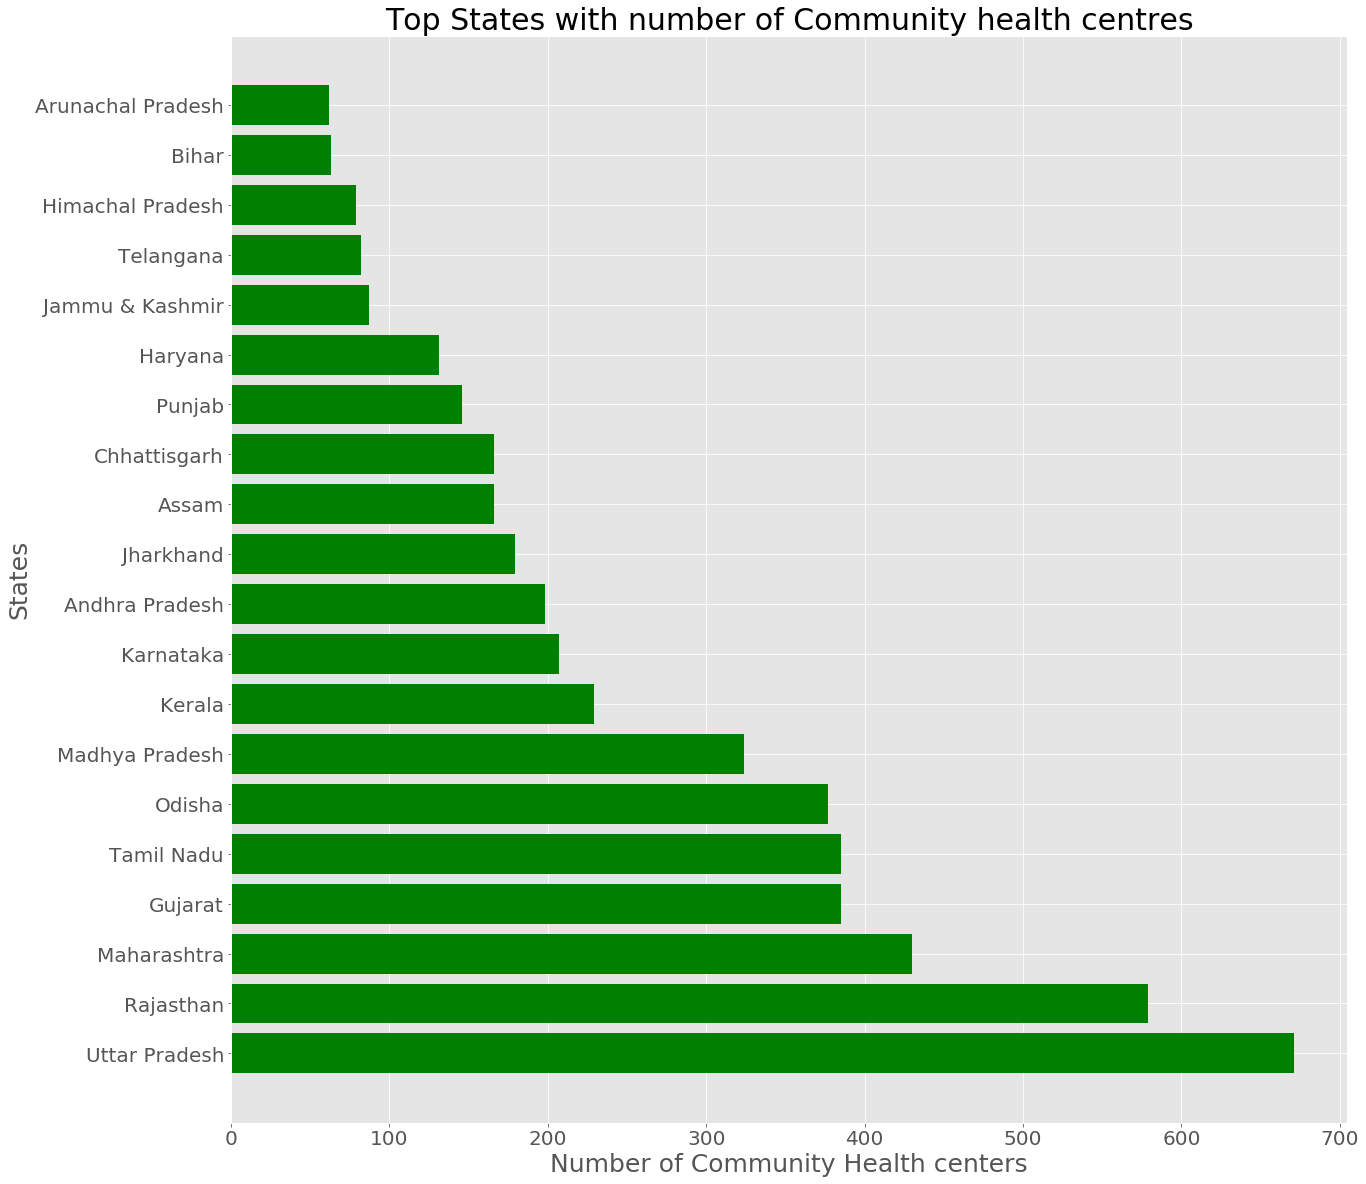

In [31]:
top=hospitalbeds.nlargest(20,'NumCommunityHealthCenters_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top States with number of Community health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Community Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumCommunityHealthCenters_HMIS'],color='green',linewidth=3)

<BarContainer object of 20 artists>

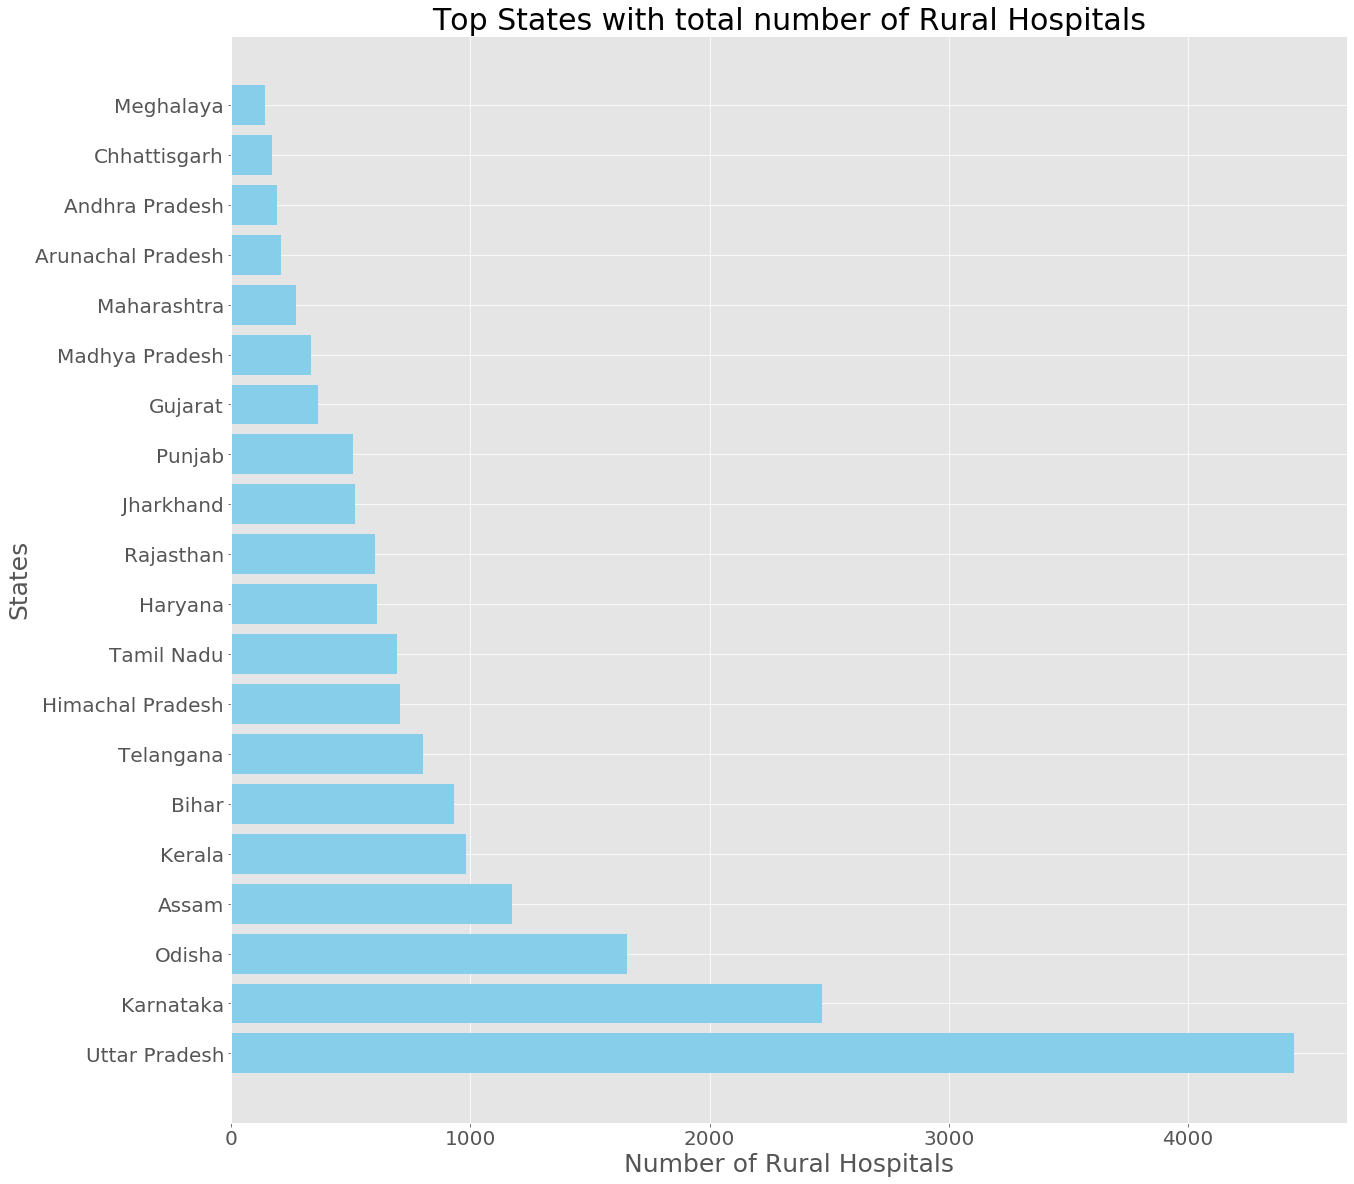

In [32]:
top=hospitalbeds.nlargest(20,'NumRuralHospitals_NHP18')

plt.figure(figsize=(20,20))
plt.title('Top States with total number of Rural Hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Rural Hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumRuralHospitals_NHP18'],color='skyblue',linewidth=3)

<BarContainer object of 20 artists>

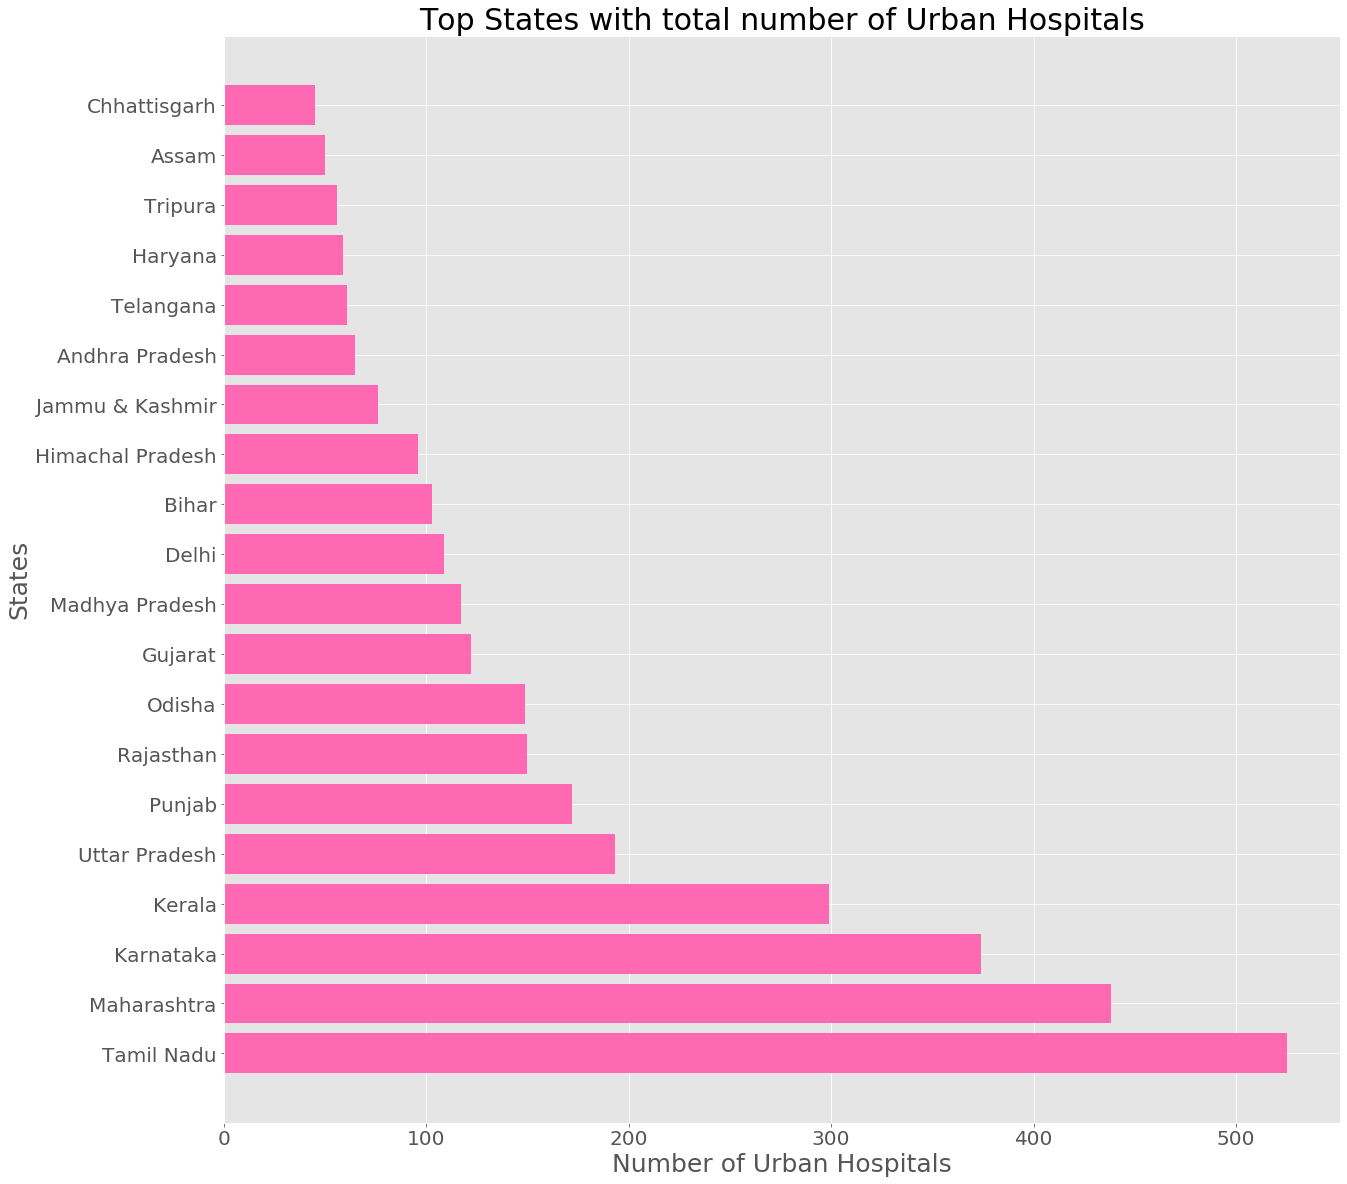

In [33]:
top=hospitalbeds.nlargest(20,'NumUrbanHospitals_NHP18')

plt.figure(figsize=(20,20))
plt.title('Top States with total number of Urban Hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Urban Hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top['State/UT'],top['NumUrbanHospitals_NHP18'],color='hotpink',linewidth=3)

In [35]:
df1=covidindia.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

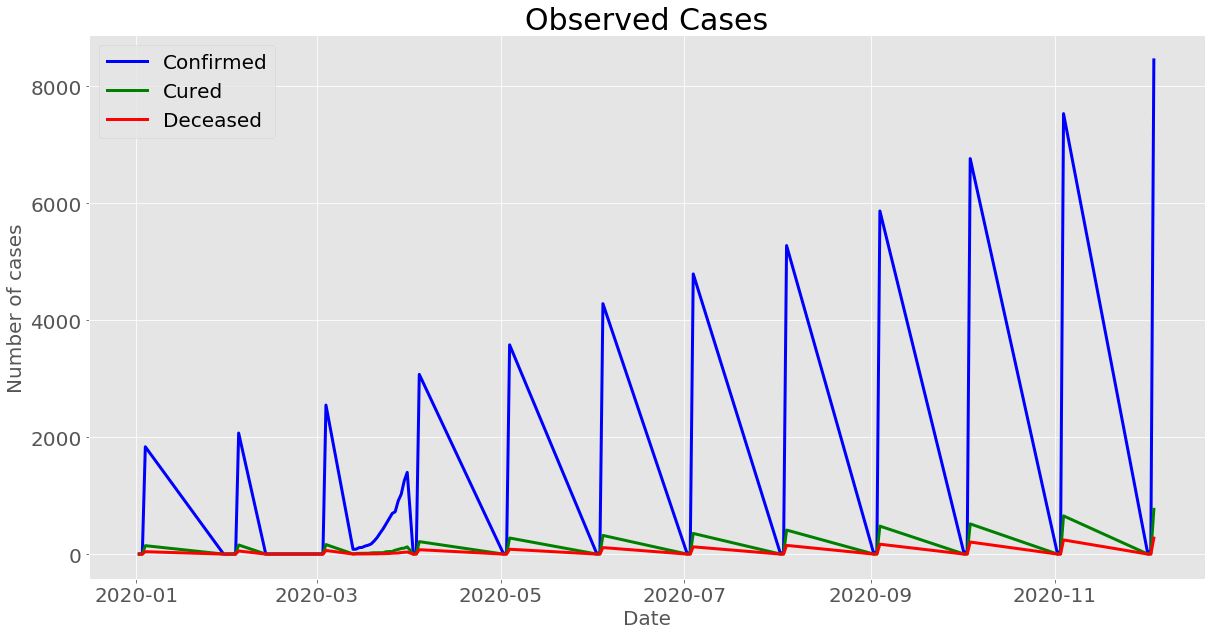

In [36]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Observed Cases',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(df1.index,df1['Confirmed'],linewidth=3,label='Confirmed',color='blue')
plt.plot(df1.index,df1['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(df1.index,df1['Deaths'],linewidth=3,label='Deceased',color='red')
plt.legend(fontsize=20)

In [37]:
df2=covidindia.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()

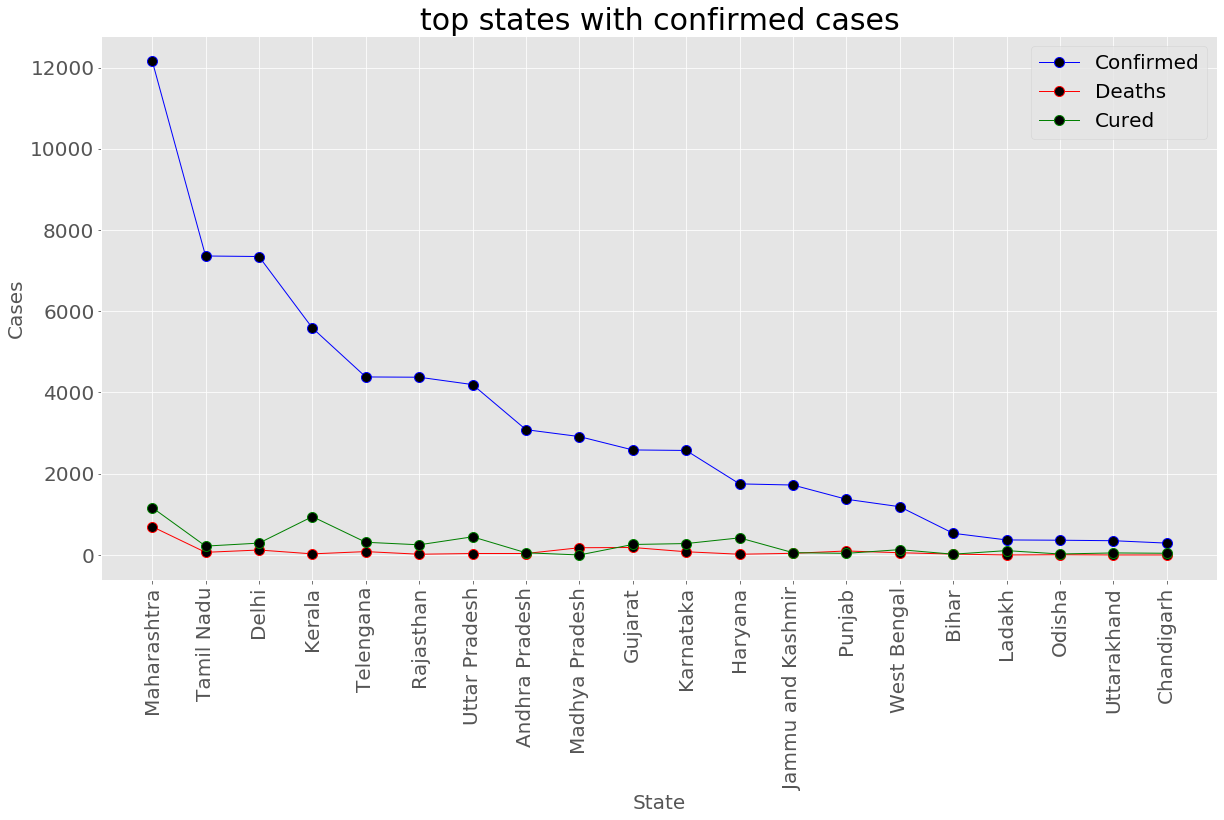

In [38]:
df2=df2.nlargest(20,'Confirmed')
plt.figure(figsize=(20,10))
plt.title('top states with confirmed cases',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.plot(df2.index,df2.Confirmed,marker='o',mfc='black',label='Confirmed',markersize=10,linewidth=1,color='blue')
plt.plot(df2.index,df2.Deaths,marker='o',mfc='black',label='Deaths',markersize=10,linewidth=1,color='red')
plt.plot(df2.index,df2.Cured,marker='o',mfc='black',label='Cured',markersize=10,linewidth=1,color='green')
plt.legend(fontsize=20)

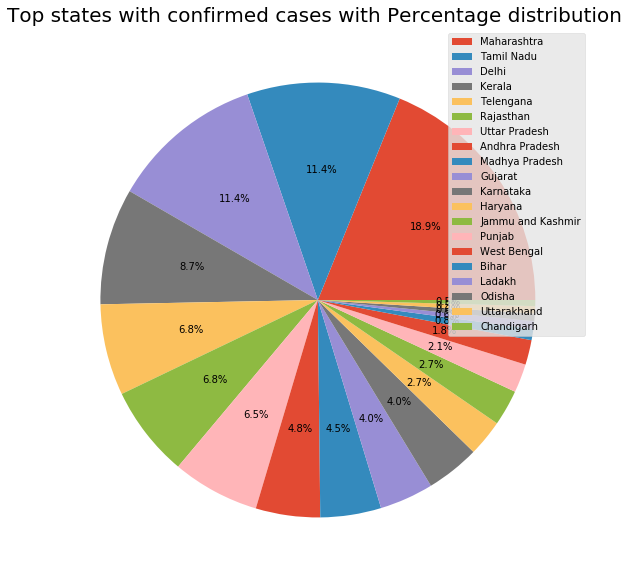

In [39]:
perc=[]
for i in df2.Confirmed:
    per=i/len(df2)
    perc.append(i)
plt.figure(figsize=(25,10))    
plt.title('Top states with confirmed cases with Percentage distribution ',fontsize=20)
plt.pie(perc,autopct='%1.1f%%')
plt.legend(df2.index,loc='upper right')

# Filling missing values


In [40]:
covidindia.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [41]:
covidindia["ConfirmedForeignNational"]=covidindia['ConfirmedForeignNational'].replace('-',0,inplace=True)
covidindia["ConfirmedIndianNational"]=covidindia['ConfirmedIndianNational'].replace('-',0,inplace=True)


In [42]:
covidindia.isnull().sum()

Sno                           0
Date                          0
Time                          0
State/UnionTerritory          0
ConfirmedIndianNational     894
ConfirmedForeignNational    894
Cured                         0
Deaths                        0
Confirmed                     0
dtype: int64

In [43]:
covidindia['ConfirmedIndianNational']=covidindia['ConfirmedIndianNational'].astype('float64')
covidindia['ConfirmedForeignNational']=covidindia['ConfirmedForeignNational'].astype('float64')

In [44]:
df3=covidindia.groupby('State/UnionTerritory')[['ConfirmedIndianNational','ConfirmedForeignNational']].sum()

In [45]:
df4=df3.nlargest(20,'ConfirmedIndianNational')
df5=df3.nlargest(20,'ConfirmedForeignNational')

<BarContainer object of 20 artists>

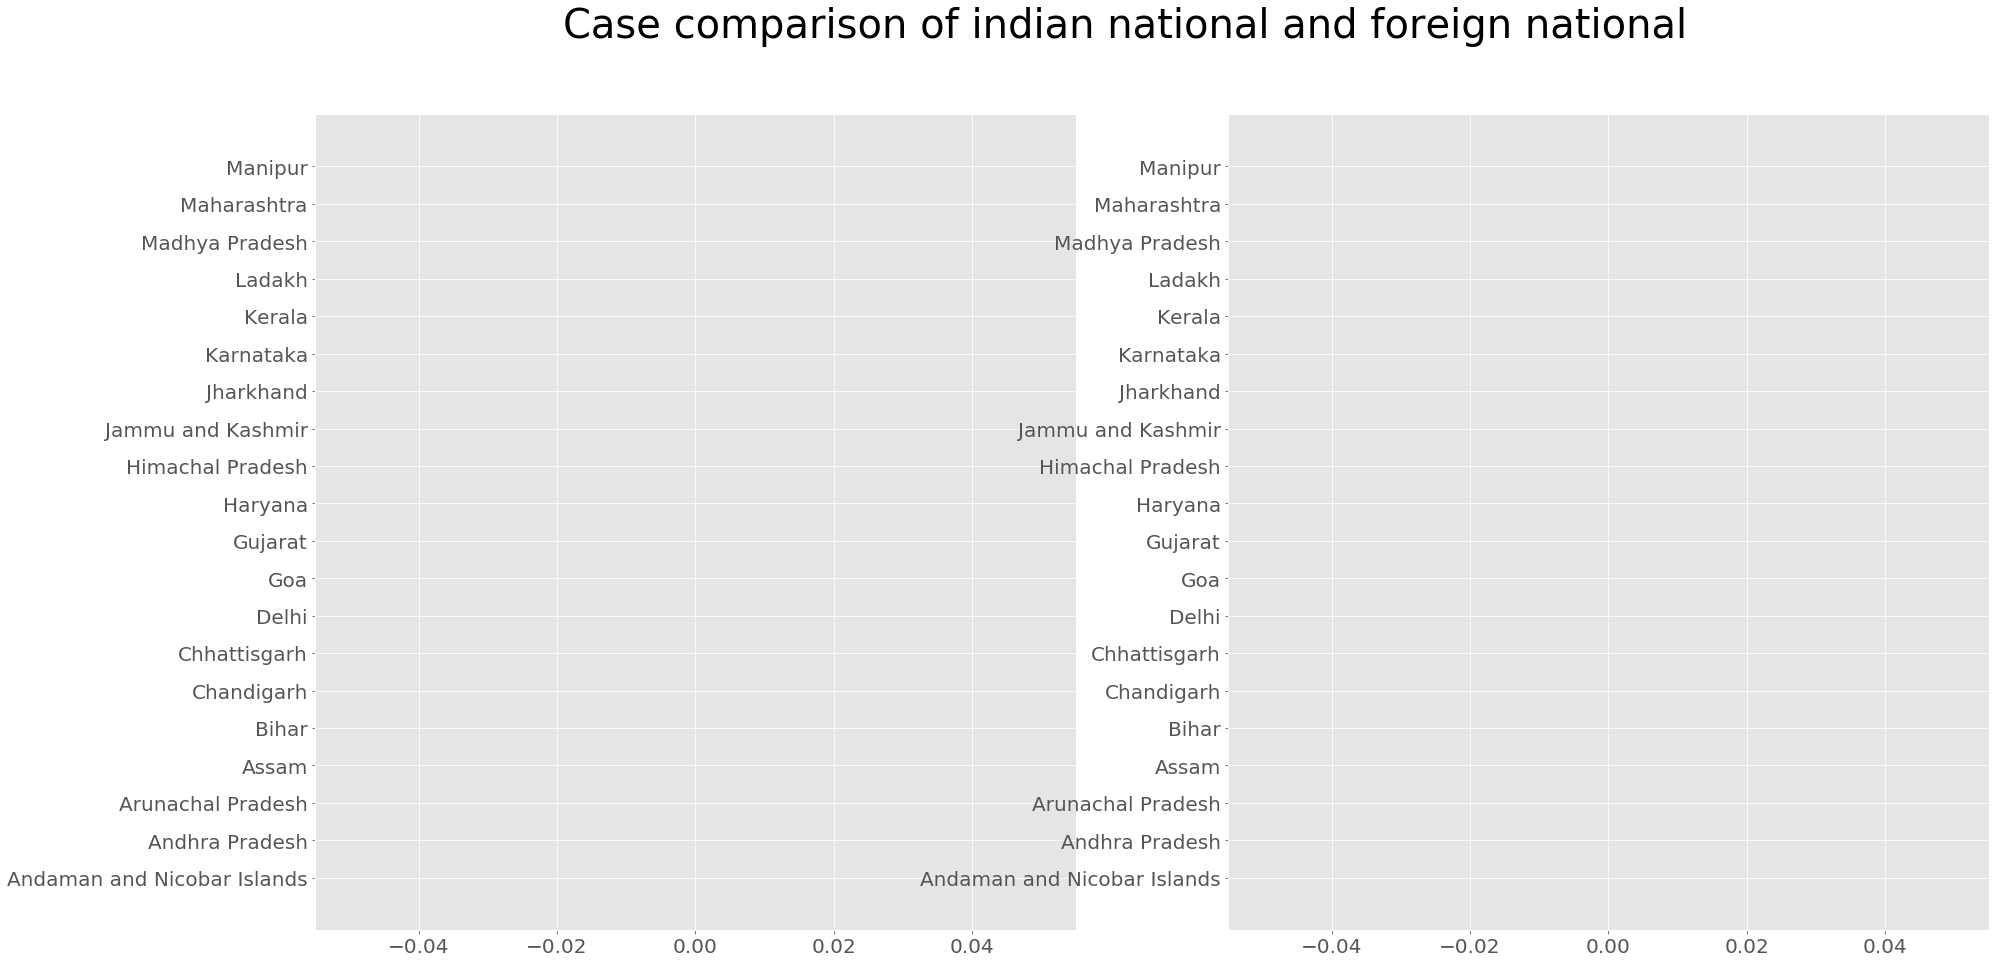

In [46]:
plt.figure(figsize=(30,15))
plt.suptitle('Case comparison of indian national and foreign national',fontsize=40)
plt.subplot(121)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df4.index,df4.ConfirmedIndianNational,color='hotpink',linewidth=3)
plt.subplot(122)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df5.index,df5.ConfirmedForeignNational,color='cyan',linewidth=3)

<BarContainer object of 20 artists>

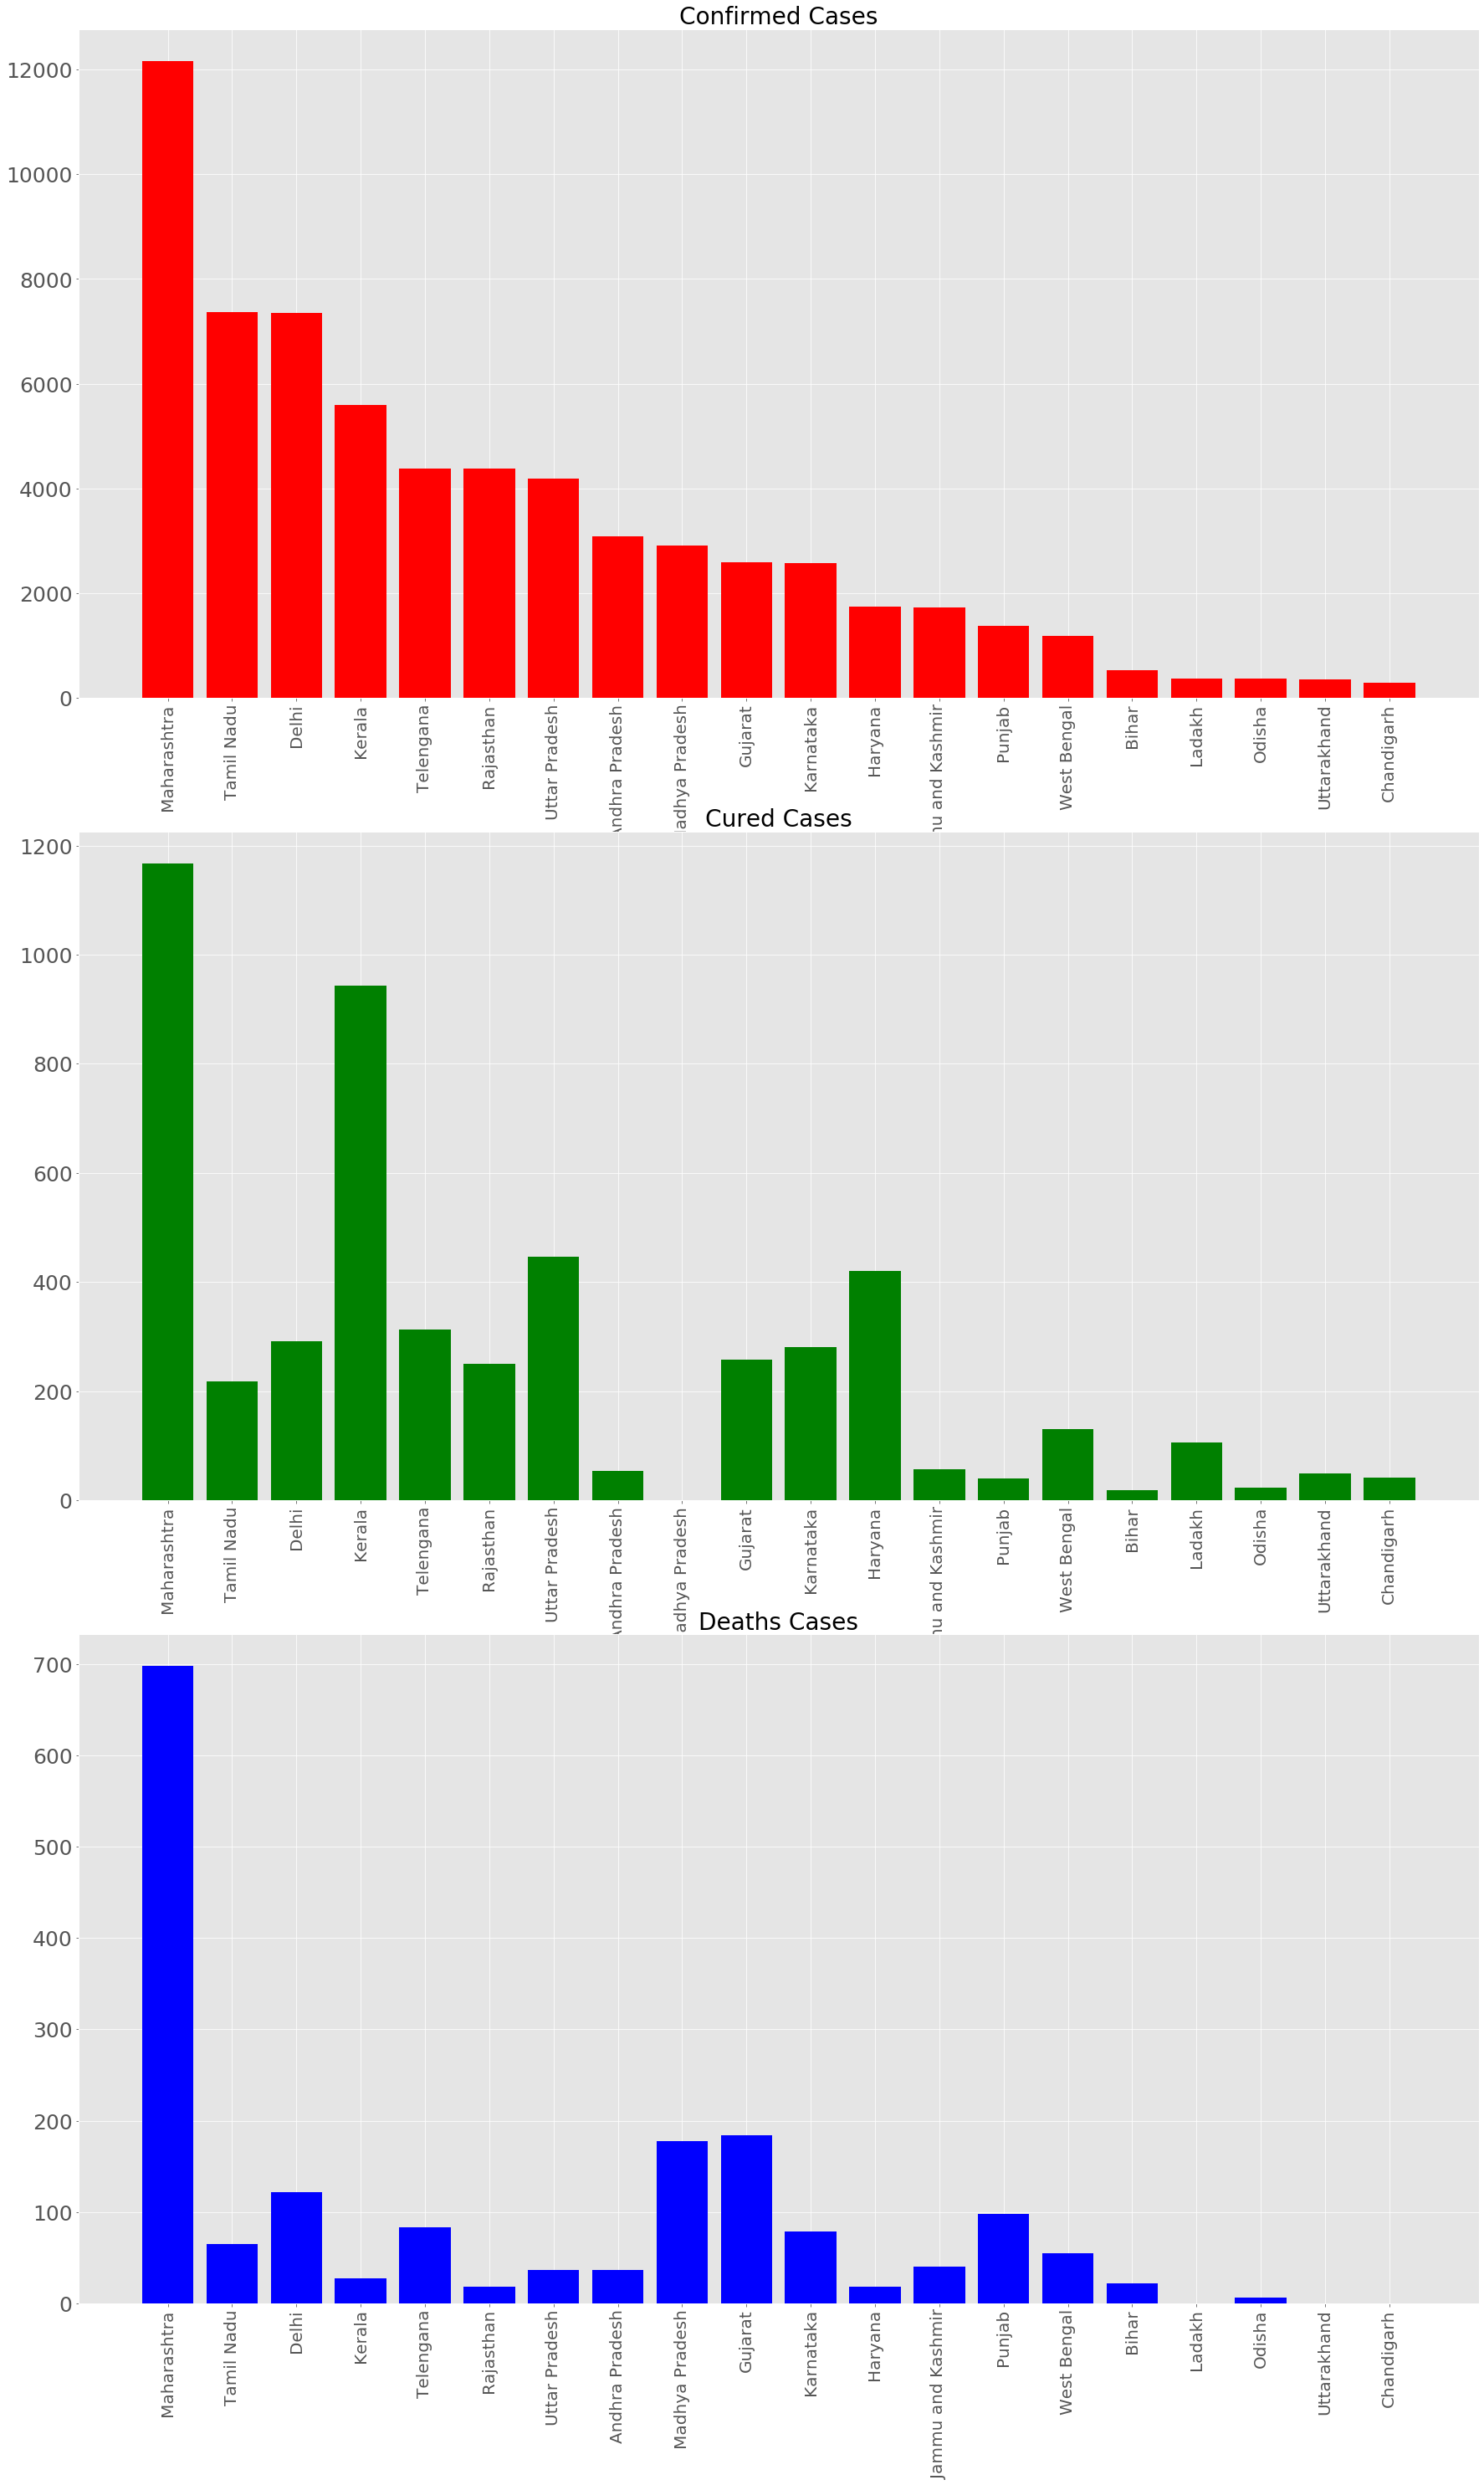

In [47]:
plt.figure(figsize=(30,50))
plt.subplot(311)
plt.title('Confirmed Cases',fontsize=28)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Confirmed,color='red',linewidth=5)
plt.subplot(312)
plt.title('Cured Cases',fontsize=28)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Cured,color='green',linewidth=5)
plt.subplot(313)
plt.title('Deaths Cases',fontsize=28)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Deaths,color='blue',linewidth=5)

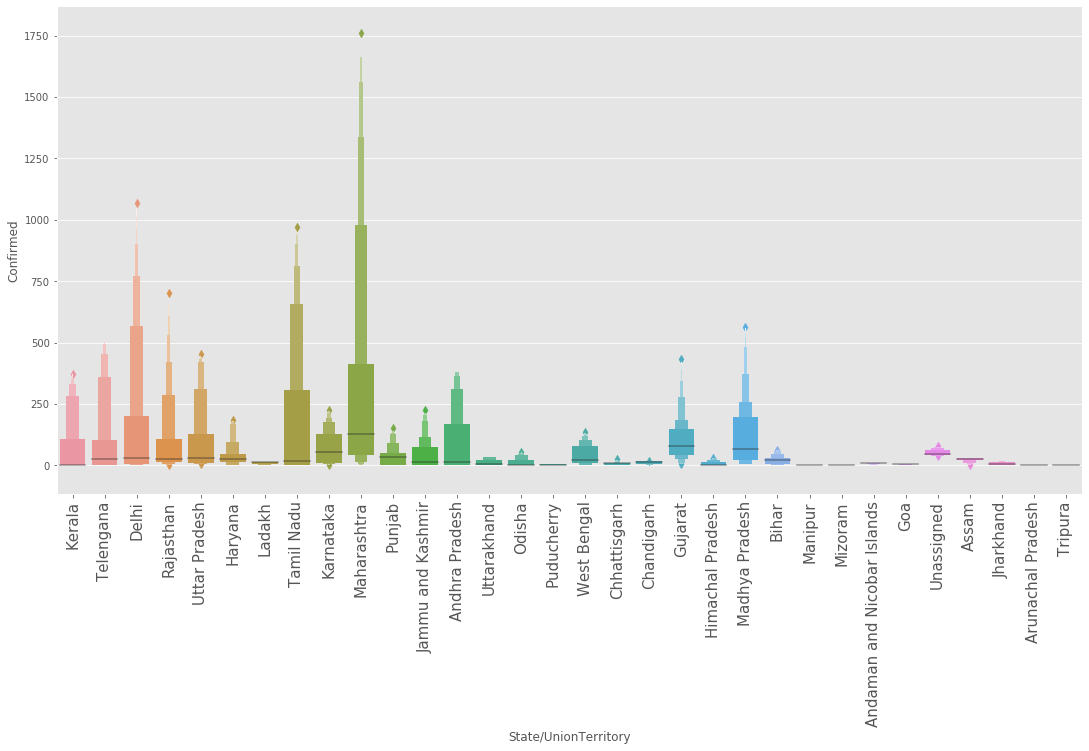

In [48]:
el=sns.catplot(x='State/UnionTerritory',y='Confirmed',kind='boxen',data=covidindia)
el.fig.set_figwidth(20)
el.fig.set_figheight(8)
el.set_xticklabels(rotation=90,fontsize=15)

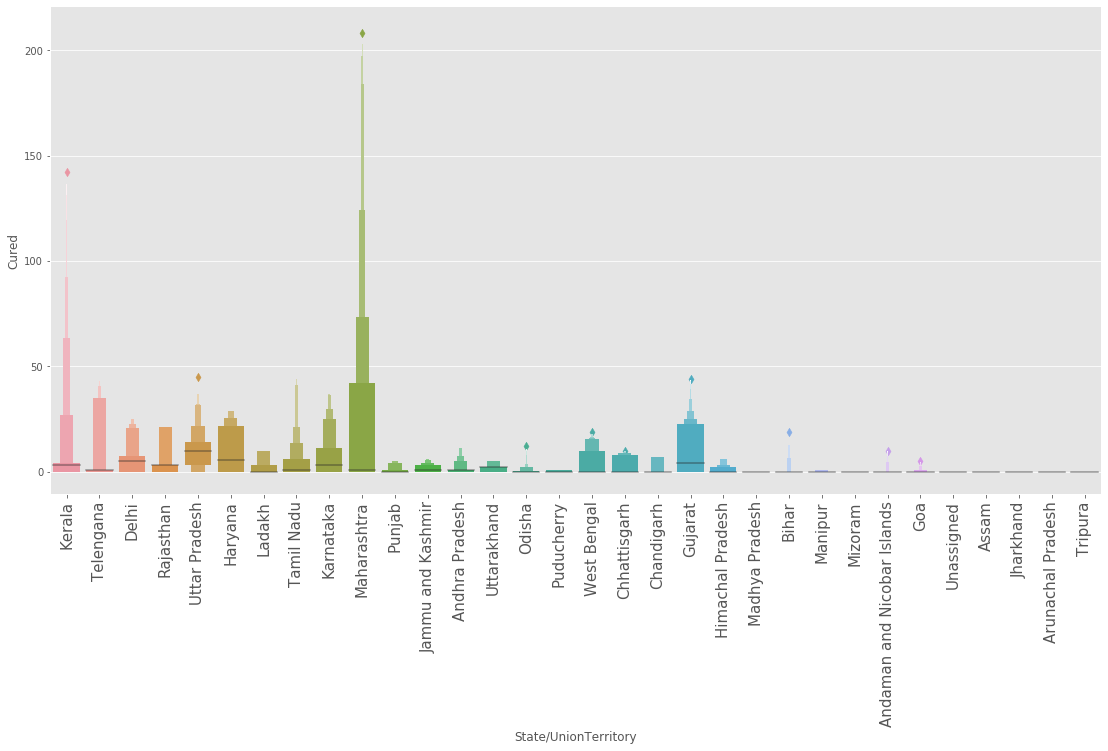

In [49]:
el=sns.catplot(x='State/UnionTerritory',y='Cured',kind='boxen',data=covidindia)
el.fig.set_figwidth(20)
el.fig.set_figheight(8)
el.set_xticklabels(rotation=90,fontsize=15)

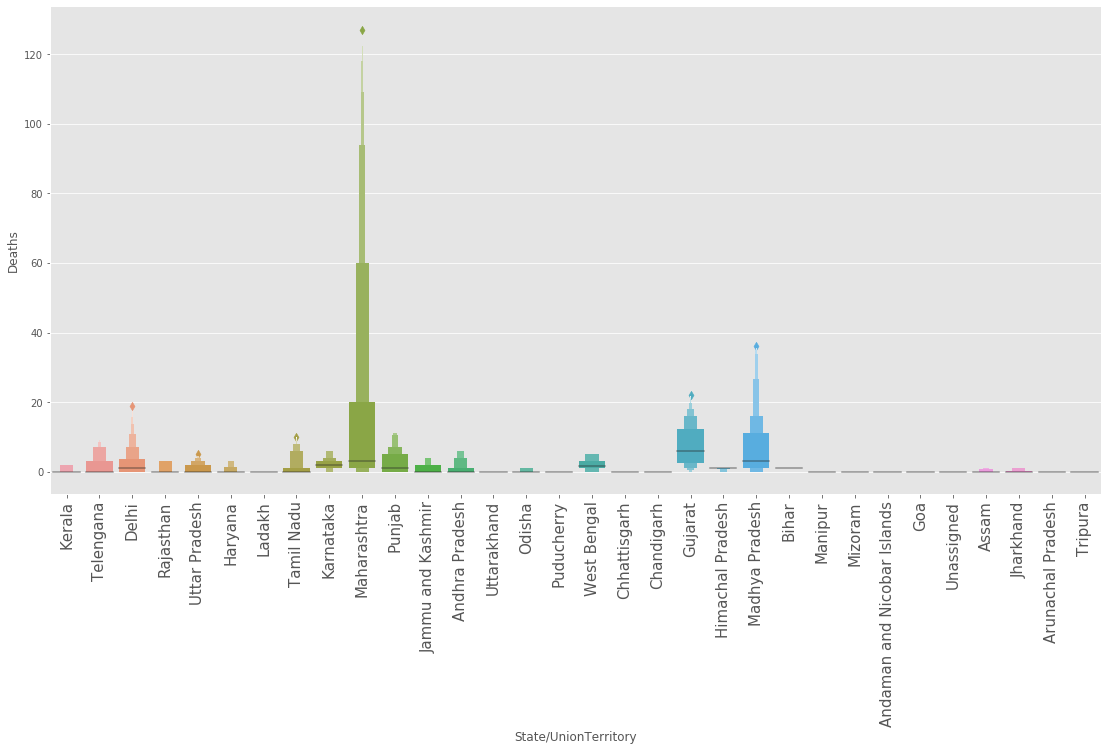

In [51]:
el=sns.catplot(x='State/UnionTerritory',y='Deaths',kind='boxen',data=covidindia)
el.fig.set_figwidth(20)
el.fig.set_figheight(8)
el.set_xticklabels(rotation=90,fontsize=15)

## ENCODING

In [52]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
covidindia['State/UnionTerritory']=lbl.fit_transform(covidindia['State/UnionTerritory'])

In [53]:
covidindia["ConfirmedForeignNational"]=covidindia['ConfirmedForeignNational'].fillna(0,inplace=False)
covidindia["ConfirmedIndianNational"]=covidindia['ConfirmedIndianNational'].fillna(0,inplace=False)

In [54]:
covidindia.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

## Date coverted to Datetime attributes

In [55]:
covidindia['Date']=covidindia['Date'].astype('datetime64[ns]')

In [56]:
covidindia['date']=covidindia['Date'].dt.day
covidindia['month']=covidindia['Date'].dt.month

In [58]:
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date,month
0,1,2020-01-30,6:00 PM,15,0.0,0.0,0,0,1,30,1
1,2,2020-01-31,6:00 PM,15,0.0,0.0,0,0,1,31,1
2,3,2020-01-02,6:00 PM,15,0.0,0.0,0,0,2,2,1
3,4,2020-02-02,6:00 PM,15,0.0,0.0,0,0,3,2,2
4,5,2020-03-02,6:00 PM,15,0.0,0.0,0,0,3,2,3


## Importing libraries

In [59]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

## model selection

In [60]:
linear=LinearRegression()
logistic=LogisticRegression()
tree=DecisionTreeRegressor()

## Splitting the dataset for train and test

In [61]:
from sklearn.model_selection import train_test_split
x=covidindia[['State/UnionTerritory','date','month','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=covidindia['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Fitting the models

In [62]:
linear.fit(x_train,y_train)
logistic.fit(x_train,y_train)
tree.fit(x_train,y_train)

C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Predication

In [63]:
from sklearn.metrics import r2_score
prediction=logistic.predict(x_test)
score1=r2_score(y_test,prediction)

In [64]:
prediction=linear.predict(x_test)
score2=r2_score(y_test,prediction)

In [65]:
prediction=tree.predict(x_test)
score3=r2_score(y_test,prediction)

# Accuracy Comparison

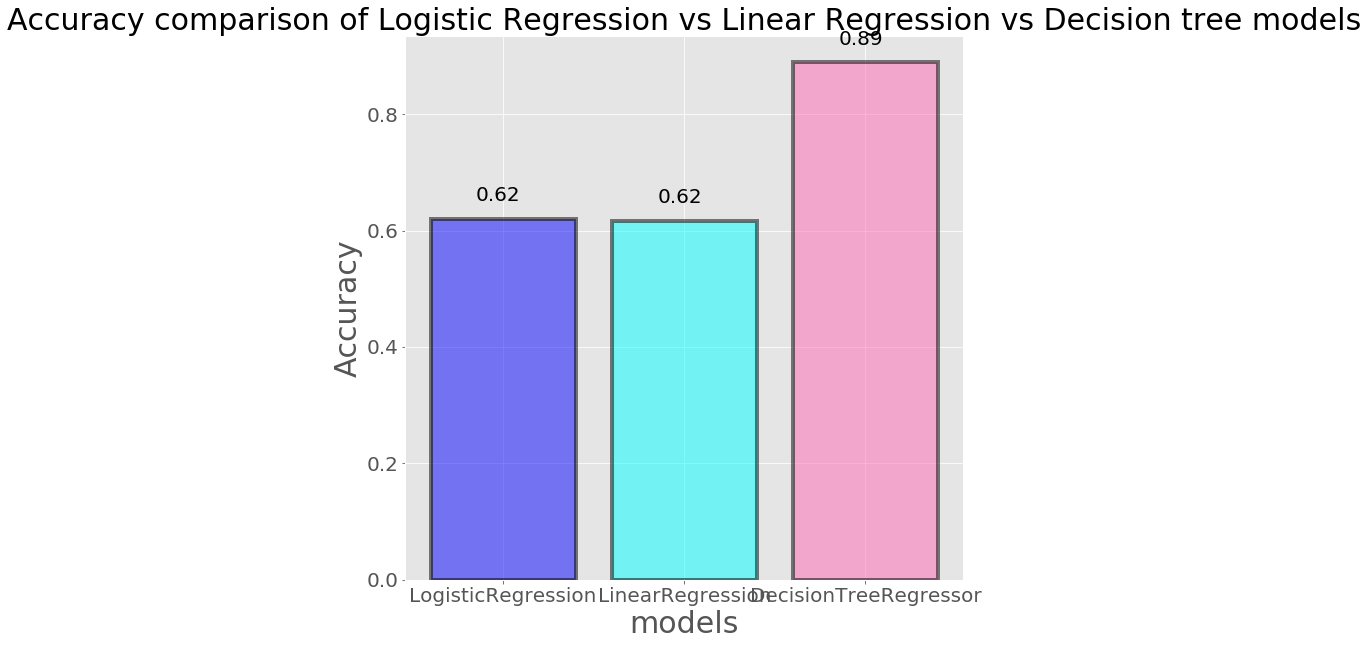

In [66]:
scores=[score1,score2,score3]
models=['LogisticRegression','LinearRegression','DecisionTreeRegressor']
plt.figure(figsize=(10,10))
plt.title('Accuracy comparison of Logistic Regression vs Linear Regression vs Decision tree models',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['blue','cyan','hotpink'],alpha=0.5,linewidth=4,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.03,format(scores[i],'.2f'),fontsize=20)